<a href="https://colab.research.google.com/github/not-rudy/Applied-Computational-Methods/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rudy Medrano

Module C

19.1 Root Finding Problem Statement

Root Finding Problem Statement: The roots/zeroes of a function f(x), are a value xr, such that f(xr) = 0. However, there is a difficulty determining an analytic or exact solution for the roots of a function; such as f(x) = cos(x) -x.
In this cases, it is useful to generate numerical approximations of the solutions. It is also useful to understand the limitations.

In [1]:
# Root Finding Example

import numpy as np
from scipy import optimize

f= lambda x: np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r = ", r)

result = f(r)
print("result = ", result)

r =  [0.73908513]
result =  [0.]


The above example just computed the root of f(x) = cos(x) -x, near -2. It gave us a result close enough to 0 to be a root.
In the next example we will compute the root of a function with no root.

In [4]:
# Finding Root of Function with No Root

import numpy as np
from scipy import optimize

f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r = ", r)

result = f(r)
print("result = ", result)
print (mesg)

r =  [-3.52047359e+83]
result =  [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


The r value which this code returned is not a root. Although the returned value is a very small number, it failed to be a root.The full_output command paired with mesg, is there to print out an error message if no solution was found. This is why it then prints out the number of calls to function reached maxfev =400. This simply means that it attempted the maximum amount of trials to find a root and no root was found.

19.2 Tolerance

Tolerance: the level or error that is acceptable for an engineering application

Error: a deviation from an expected or computed value

Converged: When a computer program has found a solution with an error smaller than the tolerance

Tolerance When Computing: When computing roots we want a value xr such that f(xr) is very close to zero. This means we need the absolute value of f(x) as a measure of error due to its value. As the magnitude of f(x) gets smaller and smaller, its more likely to be a root.

We can also use the magnitude |xi+1 -xi| to measure error since we expect improvement between subsequent guesses to diminish as it approaches a solution.

19.3 Bisection Method

Bisection Method: the use of the intermediate value theorem to iteratively find roots.

According to the intermediate value theorem, there must be a root in the open interval (a,b) if f(a) > 0 anbd f(b) < 0.

Now if we let m = (b+a)/2 be the midpoint between a and b; and f(m) < 0, then m is an improvement on the right bound b; and it is guaranteed that there is a root in the open interval (a,m).

This process can be repeated by updating the values a and b until the error is acceptably low.

In [28]:
# Example of Bisection Method
# This program will use a function that approximates a root r of f, bounded by (a,b) within a tolerance.
import numpy as np

def bisect(f, a, b, tol):
  if np.sign(f(a)) == np.sign(f(b)):
    raise Exception(
      "The scalars a and b do not bound a root")

  m = (a + b)/2

  if np.abs(f(m)) < tol:
    return m
  elif np.sign(f(a)) == np.sign(f(m)):
    return bisect(f, m, b, tol)
  elif np.sign(f(b)) == np.sign(f(m)):
    return bisect(f, a, m, tol)

f = lambda x: x**2 - 2

r1 = bisect(f, 0, 2, 0.1)
print("r1 = ", r1)
r01 = bisect(f, 0, 2, 0.01)
print("r01 = ", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))


r1 =  1.4375
r01 =  1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


19.4 Newton-Raphson Method

Newton-Raphson Method: Let f(x) be a smooth function, and xr be an unknown root of f(x). We can assume that x0 is a guess for xr; and that f(x0) will not be a root.

In this scenario, we will need to find a value x1 that is an improvement on x0. If we assume that x0 is "close enough" to xr, we can improve upon it by taking the linear approximation of f(x) around x0. This linear approximation is a line, which intersects with the x-axis.

The equation:

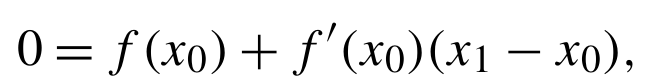

Solving for x1 yields:

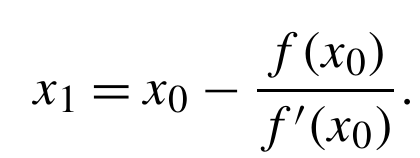

Newton Step: Computes an improved guess, xi, using a previous guess, xi-1, and is given by the equation:

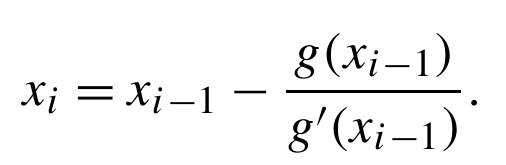

Newton-Raphson Method: iterations of Newton steps from x0 until the error is less than the tolerance.

In [36]:
# Example of Newton-Raphson
# We will be using sqrt(2) as the root of the function f(x) = x**2 -2. We can use x0 = 1.4 as a starting point.

import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

def newton(f, df, x0, tol):
  if abs(f(x0)) < tol:
    return x0
  else:
    return newton(f, df, x0 - f(x0)/df(x0), tol)

estimate = newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951
estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


19.5 Root Finding in Python

Root Finding: Python has a builtin function f_solve from scipy.optimize, which we can use to find roots.

The f_solve function takes in many arguments that include: the function and the initial guess.

In [39]:
# Root Finding in Python using f_solve

from scipy.optimize import fsolve

f = lambda x: x**4 - 200*x**2 -x + 50
fsolve(f, [1, 100])


array([ 0.49781322, 14.13578855])